   # Unemployment, 2012-2013: Data Cleaning & Visualization

In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
os.getcwd()

'C:\\Users\\esait'

In [6]:
health = pd.read_csv('/Users\esait\.jupyter\health.csv')

In [7]:
health.head()

,Indicator Category,Indicator,Year,Gender,Race/ Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes
0,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2013,Both,All,30.4,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
1,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2012,Both,All,39.6,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
2,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2011,Both,All,41.7,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
3,Cancer,All Types of Cancer Mortality Rate (Age-Adjust...,2013,Male,All,195.8,"Atlanta (Fulton County), GA","2012, 2013, 2014; per 100,000 population using...","National Center for Health Statistics (NCHS), CDC",NaN,NaN
4,Cancer,All Types of Cancer Mortality Rate (Age-Adjust...,2013,Female,All,135.5,"Atlanta (Fulton County), GA","2012, 2013, 2014; per 100,000 population using...","National Center for Health Statistics (NCHS), CDC",NaN,NaN


In [8]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13512 entries, 0 to 13511
Data columns (total 11 columns):
Indicator Category            13512 non-null object
Indicator                     13512 non-null object
Year                          13512 non-null object
Gender                        13512 non-null object
Race/ Ethnicity               13512 non-null object
Value                         13499 non-null float64
Place                         13512 non-null object
BCHC Requested Methodology    13004 non-null object
Source                        11222 non-null object
Methods                       4232 non-null object
Notes                         3541 non-null object
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


* After importing and reviewing high-level information about the dataset, I decided to get a better understanding of the health indicators and locations in the United States that were studied. I chose to focus on the indicator titled "Unemployment Rate Ages 16+". 

In [58]:
place = health['Place'].nunique()
print("Number of locations in United States studied:", place)
health.groupby(['Indicator', 'Place']).Value.mean()

Number of locations in United States studied: 29


Indicator                                                              Place                          
AIDS Diagnoses Rate (Per 100,000 people)                               Atlanta (Fulton County), GA         37.233333
                                                                       Baltimore, MD                       54.589474
                                                                       Chicago, IL                         20.905556
                                                                       Denver, CO                          15.417391
                                                                       Detroit, MI                          8.694737
                                                                       Fort Worth (Tarrant County), TX      4.114286
                                                                       Houston, TX                         19.152381
                                                                       Kansas 

* I realized that the data gathered for the unemployment indicator included one datapoint from 2014, which was associated with Portland (Multnomah County), OR, and only one datapoint (instead of two) for San Diego County, CA. I decided to remove those entries from my dataframe to ensure that my data visualization reflected the average unemployment rates between 2012 and 2013.

In [51]:
unemployment = health[(health['Indicator'] == 'Unemployment Rate Ages 16+') & (health['Gender'] == "Both") & (health['Place'] != 'San Diego County, CA') & (health['Year'] != '2014')]
print("Number of values with unemployment indicator, 2012-2013: ", len(unemployment))
print('\n')
print(unemployment[['Year', 'Value', 'Place']])


Number of values with unemployment indicator, 2012-2013:  54


      Indicator Category                   Indicator  Year Gender  \
315         Demographics  Unemployment Rate Ages 16+  2013   Both   
316         Demographics  Unemployment Rate Ages 16+  2012   Both   
539         Demographics  Unemployment Rate Ages 16+  2012   Both   
540         Demographics  Unemployment Rate Ages 16+  2013   Both   
1011        Demographics  Unemployment Rate Ages 16+  2012   Both   
1012        Demographics  Unemployment Rate Ages 16+  2013   Both   
1591        Demographics  Unemployment Rate Ages 16+  2013   Both   
1592        Demographics  Unemployment Rate Ages 16+  2012   Both   
1876        Demographics  Unemployment Rate Ages 16+  2012   Both   
1877        Demographics  Unemployment Rate Ages 16+  2013   Both   
1999        Demographics  Unemployment Rate Ages 16+  2012   Both   
2000        Demographics  Unemployment Rate Ages 16+  2013   Both   
2620        Demographics  Unemployment R

* I created a data series which depicts the average unemployment rates between 2012-2013 for each of the US locations. I used this series to create the visualization below. In this line graph, the average unemployment rate in 2012-2013 for each US location (which includes the United States as a whole) is illustrated.

In [43]:
up_unemployment = unemployment.groupby('Place').Value.mean().reset_index()
print(up_unemployment)

                              Place  Value
0       Atlanta (Fulton County), GA  13.00
1                     Baltimore, MD  13.30
2                        Boston, MA   8.85
3                       Chicago, IL  13.20
4                     Cleveland, OH  18.75
5                        Dallas, TX   8.60
6                        Denver, CO   6.55
7                       Detroit, MI  26.50
8   Fort Worth (Tarrant County), TX   7.70
9                       Houston, TX   8.80
10                  Kansas City, MO   8.50
11     Las Vegas (Clark County), NV  13.50
12                  Los Angeles, CA  11.45
13    Miami (Miami-Dade County), FL  12.05
14                  Minneapolis, MN   8.35
15                     New York, NY  10.20
16                      Oakland, CA  12.75
17                 Philadelphia, PA  14.85
18                      Phoenix, AZ   9.40
19  Portland (Multnomah County), OR   9.70
20                   Sacramento, CA  13.70
21                  San Antonio, TX   8.35
22         

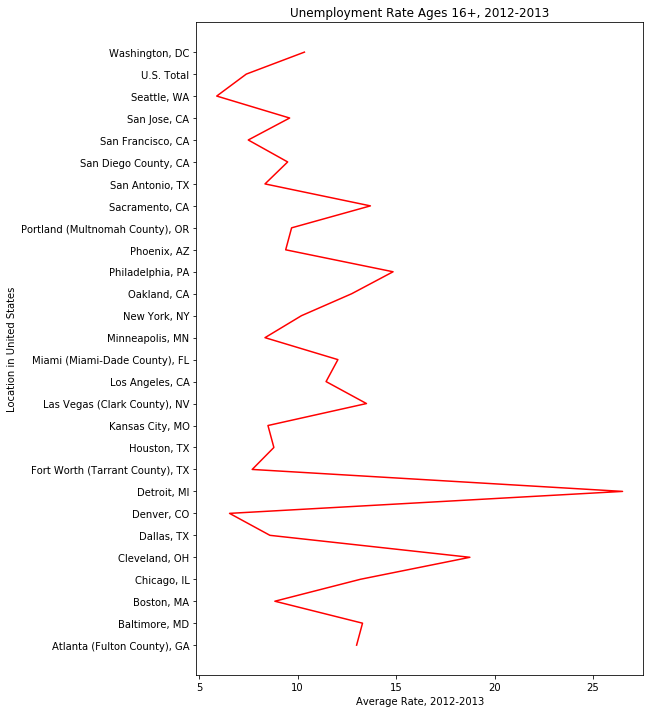

In [46]:
fig = plt.figure(figsize=(8, 12))
plt.plot(up_unemployment['Value'], up_unemployment['Place'], c='red')
plt.xlabel("Average Rate, 2012-2013")
plt.ylabel("Location in United States")
plt.title("Unemployment Rate Ages 16+, 2012-2013")
plt.show()